## Travail pratique - 1 - IFT 3700


In [1]:
#!/usr/bin/env python
%matplotlib inline

# run pip install -U scikit-learn (if scikit-learn not installed)
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
# from pyclustering.cluster.kmedoids import kmedoids  # run pip install pyclustering
import matplotlib.pyplot as plt  # run python3 -m pip install -U matplotlib
import numpy as np
import csv
import math
import copy

# load data_train in data_train
with open('mnist_train.csv') as data_train:
    csv_file = csv.reader(data_train)

    data_points = []

    for row in csv_file:
        data_points.append(row)

    # pop out first line, the "labels" of our columns
    data_points.pop(0)

# load data_test in data_test
with open('mnist_test.csv') as data_test:
    csv_file = csv.reader(data_test)

    data_points_test = []

    for row in csv_file:
        data_points_test.append(row)

    # pop out first line, the "labels" of our columns
    data_points_test.pop(0)

# Load les labels dans labels[]
labels = []

for row in data_points: 
    labels.append(row[0])  # La colonne des labels

x_train = []

for row in data_points:
    x_train.append(row[1:785])

# Load testing set in x_test
x_test = []
for row in data_points_test:
    x_test.append(row[1:785])

# Load labels in labels_test
labels_test = []
for row in data_points_test:
    labels_test.append(row[0])

In [2]:
q_train = x_train[0:1000]
euclidean_train = euclidean_distances(q_train)
print(len(x_train))
for i in range(len(euclidean_train[0])):
    print(euclidean_train[0][i])
print(type(euclidean_train))

60000
0.0
2387.111643807218
2773.149112471235
2554.8197588088283
2672.467212146858
2582.292392429641
2423.5917560513362
2169.9649766758907
2375.164625873331
2569.3078834581115
2139.8329374042264
2867.4593283950862
2666.0952721161334
2627.5760693079847
2377.237262033388
2627.911908721447
2452.252026199591
2305.5413680955717
2361.561771370802
2286.1800016621614
3153.737465294155
2661.511976302192
2430.517228904169
2562.744622470214
2413.886699909505
2731.21840942829
2490.662160952384
2388.085216234965
2841.7714545684353
2702.0340486381738
2590.299789599652
2627.523548895423
2393.2601195858338
2372.316378563365
2491.2386477413197
2608.1508775375705
2382.3291124443745
2612.5728697971276
2544.222867596312
2396.116232573036
2401.950041112429
2161.5577716082444
2387.229775283477
2143.5430949715005
2287.7751200675298
2617.665181034427
2534.771192829838
2496.3845857559686
2232.1556845345713
1917.8297630394623
2409.8062162754914
2944.956026836394
2649.1117379227326
2458.4550026388524
2598.585576

In [3]:
q_train = x_train[0:1000]

for i in range(len(q_train)):
    for j in range(len(q_train[i])):
            q_train[i][j] = float(q_train[i][j])


In [ ]:
# Pour la notion de similarité, plusieurs choix existent (http://dataaspirant.com/2015/04/11/five-most-popular-similarity-measures-implementation-in-python/)
# Comparer notre notion de similarité avec la distance euclidienne
# Faire un réduction de dimension
# TODO: Rapport
# Loader chaque vecteur dans une classe de 0..9

# Notion de similarité
# Comparaison entre les pixels de chaque image avec une autre
# Inspiration de la distance d'édition de Hamming
# Si les deux pixels sont simmilaires (i.e. les valeurs des deux pixels sont soit en haut ou en bas de 255/2),
# on considère qu'ils sont similaires, sinon (si une valeur est en haut de 255/2 et une autre en bas) on les
# considère différentes.
# Ensuite on construit une matrice de distance avec ces distances d'édition entre les différentes images.
# Critque -> beaucoup de pixel qui sont blancs 

edition_train = []
for i in range(len(q_train)):
    row = []
    for j in range(len(q_train)):
        row_x = q_train[i]
        row_y = q_train[j]
        total_dist = 0
        for k in range(len(row_x)):
            dist = abs(row_x[k] - row_y[k])
            
            # if (les pixels sont blancs) or (les pixels sont gris) or (les pixels sont noirs)
            if (row_x[k] < 255/3 and row_y[k] < 255/3) or (255/3 <= row_x[k] < 255/3*2 and 255/3 <= row_y[k] < 255/3*2) or (row_x[k] >= 255/3*2 and row_y[k] >= 255/3*2): 
                total_dist += 0
            else:  # ne sont pas de la mm couleur
                total_dist += 1
        
        row.append(total_dist)
    edition_train.append(row)


In [ ]:
print(len(edition_train))
print(edition_train[0][35])
diff = 0.0
for i in range(len(x_train[0])):
    if x_train[0][i] != x_train[35][i]:
        diff += 1.0

# print(diff)
# print(len(x_train[0]))
        
# print(x_train[0])
# print(x_train[11])
print(edition_train[0])

**k-metoïde**

In [ ]:
# SAMI 

**Partition Binaire**

### Hierarchical Clustering (Binary Partition)

Dans la section ci-dessous, nous allons appliquer l'algorithme de partition binaire, s'intitulant "Hierarchical Clustering" en anglais. Il ya deux types de "Hierarchical Clustering": il y a le agglometrative et le decisive. Dans notre cas, nous allons nous préoccuper du agglomerative clustering. De plus, l'algorithme de "Hierarchical Clustering" a pour but de "prédire" des données non étiquettés.<br>
Pour commencer, nous allons importer Agglomerative Clustering de sklearn.cluster puisque cette dernière nous aidera à appliquer l'algorithme. <br>
Dans la cellule ci-dessous nous allons également appliquer le groupage des clusters. Il y a principalement 4 méthodes pour mesurer la distance entre 2 clusters: <br>
* Measure the distance between the closes points of two clusters.
* Measure the distance between the farthest points of two clusters.
* Measure the distance between the centroids of two clusters.
* Measure the distance between all possible combination of points between the two clusters and take the mean.
<br>
(Source: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)

In [4]:
from sklearn.cluster import AgglomerativeClustering

La prochaine étape est de bien préparer nos données. Pour de fins d'utilié et de représentation, nous allons utiliser les 1000 premières données. Nous allons également convertir nos 1000 premières données en array de NumPy.

In [10]:
agglomerative_clustering_train = np.array(copy.deepcopy(x_train[0:1000]))
agglomerative_clustering_labels = np.array(copy.deepcopy(labels[0:1000]))

for i in range(len(agglomerative_clustering_train)):
    for j in range(len(agglomerative_clustering_train[i])):
            agglomerative_clustering_train[i][j] = int(agglomerative_clustering_train[i][j])

Impimons la première donnée de notre agglomerative_clustering_train pour visualiser notre NumPy Array.

In [11]:
print(agglomerative_clustering_train[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

La prochaine étape est de créer un object hirarchical_clustering en utilisant le constructeur AgglomerativeClustering. Nous allons également appeler fit_predict pour prédire les clusters que les points prendrons part. La méthode fit_predict retournera le cluster que chaque point prend part. Nous utilisons la distance euclidienne.<br>
**Prenez note**: que nous utilisons le linkage comm étant ward puisque ce dernier minimise la variance des clusters à fusionner.

In [12]:
# The Treshold is that every cluster's dissimilarity (inside and amonsgt them) will always be smaller or equal to that cluster
# Here our thresh hold is 10 as the number of classes in mnist data set (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

hierarchical_clustering = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward') 
y_hierarchical_clustering = hierarchical_clustering.fit_predict(agglomerative_clustering_train)  

Imprimons notre matrice avec les points appartenant à dites cluster.

In [13]:
print(hierarchical_clustering.labels_)

[4 0 1 3 1 6 9 8 9 1 4 2 4 5 9 7 0 2 4 2 1 0 2 3 4 4 1 8 0 2 1 2 4 2 0 2 5
 0 1 5 9 4 1 3 4 1 4 2 4 4 4 0 1 2 1 2 0 1 1 3 1 2 5 0 1 2 5 3 0 0 4 2 9 5
 4 0 4 3 3 2 4 0 0 5 1 2 4 1 0 1 5 7 1 5 2 0 1 2 4 3 4 1 9 7 9 3 4 8 0 1 1
 4 9 3 0 1 1 4 0 0 0 0 4 7 9 4 4 1 9 5 4 1 4 1 1 8 4 3 4 1 3 2 1 4 4 2 2 5
 1 4 1 5 9 2 1 5 0 8 1 4 1 4 1 2 1 5 1 1 3 0 1 4 1 2 9 2 1 3 0 4 3 4 4 1 9
 7 4 4 4 4 4 2 0 7 1 2 1 2 4 4 9 3 2 4 5 3 0 4 9 0 0 9 1 6 1 8 0 1 4 2 6 5
 1 7 1 2 1 1 1 0 7 9 4 6 0 8 2 1 5 2 4 1 8 7 0 2 0 1 9 0 1 9 4 6 4 8 4 1 1
 2 1 5 4 7 1 2 4 1 1 3 9 1 1 2 4 1 9 6 4 8 1 8 1 0 4 1 5 2 1 1 3 8 1 0 1 2
 0 1 4 5 4 7 5 0 1 7 0 7 6 3 9 5 4 1 1 3 4 6 4 1 0 8 1 1 1 6 0 8 4 1 4 5 4
 4 1 2 1 7 1 6 1 8 1 2 1 3 1 6 4 7 1 3 4 7 1 3 4 3 9 0 4 8 1 1 1 6 9 5 4 1
 9 7 1 1 1 6 4 7 4 1 1 6 9 1 1 6 4 7 4 1 4 6 4 2 4 5 4 3 9 0 4 5 1 2 4 8 9
 2 9 1 4 7 1 1 5 2 3 2 2 1 1 5 1 1 1 4 1 0 1 0 4 5 0 8 1 0 1 2 1 2 0 1 1 3
 9 2 1 3 6 5 9 0 0 0 9 3 4 6 0 4 1 1 0 2 0 5 9 0 1 2 4 2 4 0 4 3 4 6 1 8 4
 1 1 0 9 2 4 2 4 0 4 3 3 

Maintenant, visualisons notre graphe avec nos données.

In [14]:
y_hierarchical_clustering = hierarchical_clustering.labels_
# print(len(cluster.labels_)) It's the same as our q_train array
labels_hc = labels[0:1000]

# The result will be a vector of 1000 entries and were every entry belongs to as certain cluster
miss_calculations = 0
for i in range(len(y_hierarchical_clustering)):
    if not y_hierarchical_clustering[i] == int(agglomerative_clustering_labels[i]):
        miss_calculations += 1

print(f"If we only assumed that the klusters were the labels to take, by simply using the data, we would misplace " 
      + str(miss_calculations) + " out of " + str(1000) + " labels.")

If we only assumed that the klusters were the labels to take, by simply using the data, we would misplace 859 out of 1000 labels.


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 18.0, 18.0, 18.0, 126.0, 136.0, 175.0, 26.0, 166.0, 255.0, 247.0, 127.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 36.0, 94.0, 154.0, 170.0, 253.0, 253.0, 253.0, 253.0, 253.0, 225.0, 172.0, 253.0, 242.0, 195.0,

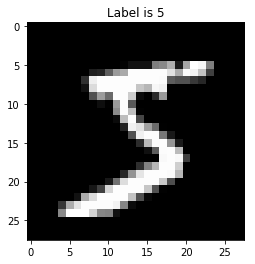

In [15]:
# The first data from x_train
pixels = q_train[0]
print(pixels)
# Make those columns into a array of 8-bits pixels
# This array will be of 1D with length 784
# The pixel intensity values are integers from 0 to 255
pixels = np.array(pixels, dtype='uint8')

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
plt.title('Label is {label}'.format(label=labels[0]))
plt.imshow(pixels, cmap='gray')
plt.show()

#### Hierarchical Clustering  (Binary Partition) avec Silhouette data set
Dans la démo 2, nous nous sommes fais présentés le data set silhouette.csv. Ce dernier est en effet les 5000 premières données de MNIST mais ayant subit une réduction de dimensionnalité.<br>
La première étape est de charger les données dans un tableau.

In [16]:
with open('silhouette.csv') as silhouette_data_train:
    silhouette_data_train = np.loadtxt('silhouette.csv')

Par la suite, puisqu'il n'y a pas de labels dans silhouette.csv, nous allons utiliser les 1000 premièrs labels de notre mnist_train.csv.<br>
**Prenez note**: Nous utilisons seulement les 1000 premières données question de ne pas recontrer Memory Error.

In [17]:
silhouette_labels = copy.deepcopy(labels[0:1000])
silhouette_data_train = copy.deepcopy(silhouette_data_train[0:1000])

Ci-dessous, nous avons simplement représenté nos 1000 premières données de silhouette_data_train dans un graphique. Puisque nous avons charger un data set de 2 dimensions, il se prouve facile de représenter les données dans un graphe conventinnel x,y.

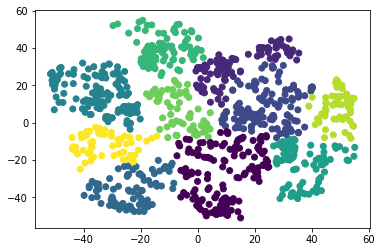

In [18]:
y_pred = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward').fit_predict(silhouette_data_train)
plt.scatter(silhouette_data_train[:,0], silhouette_data_train[:,1], c=y_pred)

Maintenant, nous allons utiliser la librairie SciPy pour créer un dendrogramme.<br>
Il est utile de créer un dendogramme pour savoir combien de cluster sont en réalité nécessaire. Bien que nous sommes familier avec MNIST et que nous sachions qu'il y aura 10 clusters, il faut tout de même le représenter en dendrogramme. Pour une utilisation future avec des données qui ne sont pas familières, il se vaut utile.<br>
Comme d'habitude, la première étape est de charger les librairies nécessaire.

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
import sklearn.metrics as sm

Maintenant que nous avons nos imports, nous allons créer notre dendrogramme pour trouver le bon "threshold".<br>
**Threshold**: Le threshold se réfère à la dissimilarité entre les clusters. Ça va toujours être plus petit ou égal au nomtre de clusters.

In [20]:
for i, value in enumerate(silhouette_data_train): 
    for j, value in enumerate(silhouette_data_train[i]):
        silhouette_data_train[i][j] = float(silhouette_data_train[i][j])

En premier temps, nous allons créer le linkage entre nos données et les 'ward'.

In [21]:
Z = linkage(silhouette_data_train, 'ward')

Créeons le dendrogramme maintenant!<br>
Pour de fin de visualisation et pour rendre le dendrogramme plus conviviable, nous allons créer un *Truncated Hierarchical Clustering Dendrogram*.<br>
De plus, comme mentionnée plus haut, nous devons mettre un threshold à un certain niveau pour savoir exactement le nombre de clusters à mettre. Pour le threshold, il faut prendre la distance verticale la plus haute sans couper une ligne horizontale. La distance est aux alentours de y = 200. Cela va créer 10 clusters.

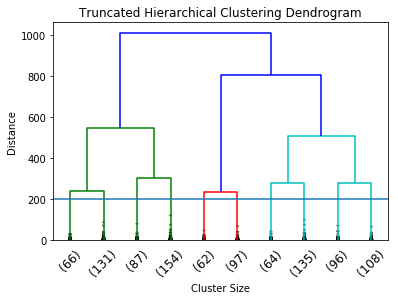

In [22]:
dendrogram(Z, truncate_mode='lastp', p=10, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title("Truncated Hierarchical Clustering Dendrogram")
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=200)

plt.show()

Convertir les labels en int pour pouvoir utiliser accurary_score venant de sklearn.metrics.

In [23]:
for i in range(len(silhouette_labels)):
    silhouette_labels[i] = int(silhouette_labels[i])

In [26]:
Hclustering = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
Hclustering.fit(silhouette_data_train)

print("Le score de notre Hierarchical Clustering est de : " 
     + str(sm.accuracy_score(silhouette_labels, Hclustering.labels_) * 100)
     + " %.")

Le score de notre Hierarchical Clustering est de : 23.1 %.


Comparons maintenant avec plusieurs différents linkage types.

In [28]:
# linkage -> complete
Hclustering = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='complete')
Hclustering.fit(silhouette_data_train)

print(f"Accuracy score for complete linkage : {str(sm.accuracy_score(silhouette_labels, Hclustering.labels_) * 100)}  %.")
# sm.accuracy_score(silhouette_labels, Hclustering.labels_)

# linkage -> average 
Hclustering = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='average')
Hclustering.fit(silhouette_data_train)

print(f"Accuracy score for average linkage : {str(sm.accuracy_score(silhouette_labels, Hclustering.labels_) * 100)}  %.")
# sm.accuracy_score(silhouette_labels, Hclustering.labels_)

# linkage -> single
Hclustering = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='single')
Hclustering.fit(silhouette_data_train)

print(f"Accuracy score for single linkage : {str(sm.accuracy_score(silhouette_labels, Hclustering.labels_) * 100)} %.")
# sm.accuracy_score(silhouette_labels, Hclustering.labels_)

Accuracy score for complete linkage : 13.8  %.
Accuracy score for average linkage : 5.8999999999999995  %.
Accuracy score for single linkage : 5.1 %.


**PCoA**

In [29]:
# ZAK

**IsoMap**

**KNN**

Steps taken for KNN algorithm:
1. Choose the number K of neighbors.
2. Take the K nearest neighbors of the new data point, according to the Euclidean distance.
3. Among those K neighbors, count the number of data points in each category.
4. Assign the new data point to the category where you counted the most neightbors.

Comme d'habitude, nous devons importer les librairies nécessaires. Nous importons KNeighborsClassifier de sklearn pour créer notre classifieur et confusion_matrix (vous verrez pourquoi ;))<br>
Nous importons également la librairie copy pour faire un deepcopy. On ne veut pas juste pointer au même objet.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

En premier lieu, nous allons utiliser le jeu de donnée silhouette pour notre modèle K-NN. Rappelons nous que silhouette.csv
est en fait les 5000 premières données de MNIST ayant subi une réduction de dimensionnalité.

In [32]:
knn_silhouette_train = copy.deepcopy(silhouette_data_train)
knn_silhouette_train_labels = copy.deepcopy(silhouette_labels)

Nous allons maintenant procéder à créer notre classifeur de K-NN. <br> (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) <br>
En regardant, la documentation de sklearn.neighbors.KNeighborsClassifier nous pouvons voir que le constructeur KNeighborsClassifer prend plusieurs arguments en entrée. Les plus importants sont n_neighbors (le nombre de voisins), p et metric (lorsque metric prend la valeur de 'minkowski', si p=1 le constructeur utilisera la mesure de similarité Manhattan et lors que p=2 le constructeur utilisera la mesure de similarité Euclidean).

In [33]:
silhouette_classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
silhouette_classifier.fit(knn_silhouette_train, knn_silhouette_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
print("Le score de notre silhouette classifeur est de : " 
      + str(silhouette_classifier.score(knn_silhouette_train, knn_silhouette_train_labels) * 100) 
      + " %.")


Le score de notre silhouette classifeur est de : 96.7 %.


Même si nous avons un excellent résultant (96.7%), essayons maintenant de trouver un **k** permettant d'améliorer ce résultat. 

In [35]:
score_train = []
for k in np.arange(1, 50):
    clf = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    clf.fit(knn_silhouette_train, knn_silhouette_train_labels)
    score_train.append(clf.score(knn_silhouette_train, knn_silhouette_train_labels))

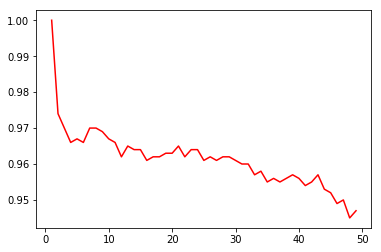

In [37]:
plt.plot(np.arange(1, 50), score_train, color='red')

Comme on peut voir, K-NN est très performant avec le jeu de donnée silhouette.csv. Plus on augmente le nombre de voisins *k*, la performance de l'algorithme diminue tranquillement. Il reste toutefois, un taux de succès à plus de 90 %.

Malheureusement, nous avons beau avoir un aussi bon résultat, il n'y as pas de manière à tester notre classifieur de silhouette, puisque nous avons seulement un training set et non un test set. De plus nous ne pouvons pas utiliser le test set de MNIST_test.csv puisque ce ne sont pas les mêmes dimensions de données.

Nous devons prendre un autre chemin !

Pour palier à noter classifieur plus haut, nous allons créer un classifieur avec les données de MNIST_train.csv. Nous commençons par charger le jeu de données mnist_train.csv dans une nouvelle variable. Comme d'habitude, nous allons seulement utiliser les 1000 premières données question d'éviter un Memory Error. <br>
**Prenez note**: Nous convertissons nos données d'entrainements et les labels respectifs à des NumPy array de type float64. 

In [38]:
knn_mnist_data_train = copy.deepcopy(x_train[0:1000])
knn_mnist_data_labels = copy.deepcopy(labels[0:1000])
knn_mnist_data_train = np.array(knn_mnist_data_train).astype(np.float64)
knn_mnist_data_labels = np.array(knn_mnist_data_labels).astype(np.float64)

Procédons de manière similaire à créer notre classifieur en utilisant le data set MNIST_train.csv.

In [39]:
mnist_classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
mnist_classifier.fit(knn_mnist_data_train, knn_mnist_data_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [40]:
print("Le score de notre K-NN classifeur est de : " 
      + str(mnist_classifier.score(knn_mnist_data_train, knn_mnist_data_labels) * 100)
      + " %.")

Le score de notre K-NN classifeur est de : 90.8 %.


Même si nous avons un bon résultant (90.8%), essayons maintenant de trouver un **k** permettant d'améliorer ce résultat. 

In [41]:
score_train = []
for k in np.arange(1, 50):
    clf = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    clf.fit(knn_mnist_data_train, knn_mnist_data_labels)
    score_train.append(clf.score(knn_mnist_data_train, knn_mnist_data_labels))

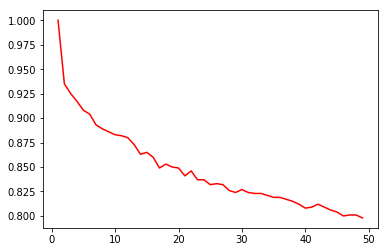

In [42]:
plt.plot(np.arange(1, 50), score_train, color='red')

On peut voir que l'algorithme K-NN est performant lorsque le nombre de voisins n'est pas trop grand. Bien évidemment, il n'y a pas de chiffre magique (nos sommes en statistics, alors tout dépend du use case), mais on peut toutefois faire un hypothèse qu'un k de 5 est un "bon" k.

Maintenant, testons notre classifieur avec des données de tests!

In [43]:
knn_mnist_data_test = copy.deepcopy(x_test[0:1000])
knn_mnist_data_labels_test = copy.deepcopy(labels_test[0:1000])
knn_mnist_data_test = np.array(knn_mnist_data_test).astype(np.float64)
knn_mnist_data_labels_test = np.array(knn_mnist_data_labels_test).astype(np.float64)

In [44]:
print("Le score de notre K-NN classifeur (avec les données test) est de : " 
      + str(mnist_classifier.score(knn_mnist_data_test, knn_mnist_data_labels_test) * 100)
      + " %.")

Le score de notre K-NN classifeur (avec les données test) est de : 81.5 %.


En comparaison des données d'entrainement et les données de test, nous passons de 90.8 % à 81.5%. Il y a une certaine "perte" de performance. Mais avec plus d'entrainement on pourrait avoir de meilleurs résultats !